In [1]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


2023-10-31 02:57:16.694211: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
pd.set_option("display.float_format", lambda x: "%.4f" % x)
pd.set_option("display.max_columns", None)

# Recognizing and Understanding Data

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
print('''
Shape of x_train is {} 
Shape of x_test is {} 
Shape of y_train is {} 
Shape of y_train is {} 
'''.format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))


Shape of x_train is (60000, 28, 28) 
Shape of x_test is (10000, 28, 28) 
Shape of y_train is (60000,) 
Shape of y_train is (10000,) 



### use matplotlib to view an image from the dataset.

In [5]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

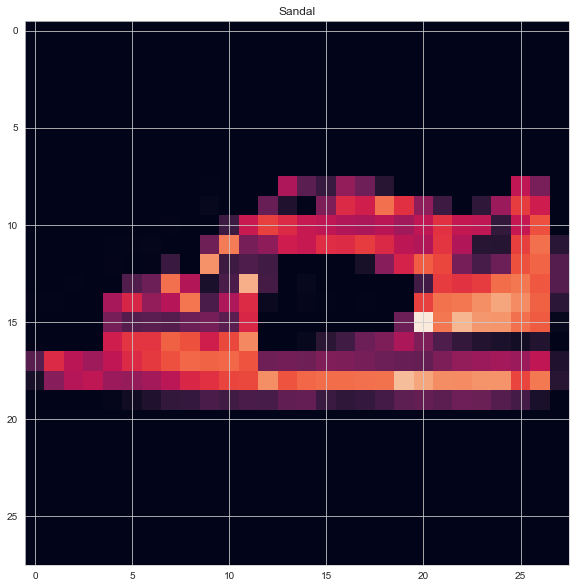

In [14]:
plt.rcParams["figure.figsize"] = (20, 10)
sns.set_style("whitegrid")
plt.imshow(x_train[13])
plt.title(classes[y_train[13]])
plt.show()

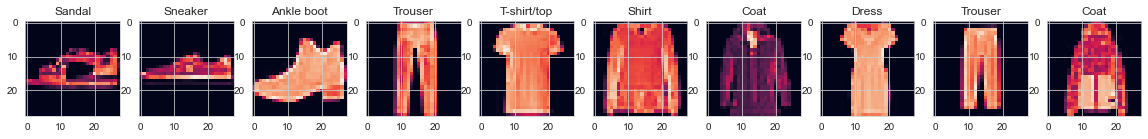

In [15]:
start , end = 13 , 23
for i in range(start, end):
    plt.subplot(1, end - start, i - start+1)
    plt.imshow(x_train[i])
    plt.title(classes[y_train[i]])

plt.show()

# Data Preprocessing

In [16]:
print(
    '''
    Max Values Train : {}
    Min Values Train : {}

    '''.format(x_train.max(),x_train.min())
)


    Max Values Train : 255
    Min Values Train : 0

    


In [17]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [18]:
print(
    '''
    Max Values Train : {}
    Min Values Train : {}

    '''.format(x_train.max(),x_train.min())
)


    Max Values Train : 1.0
    Min Values Train : 0.0

    


### Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set


In [19]:
print('''
Shape of x_train is {} 
Shape of x_test is {} 

'''.format(x_train.shape, x_test.shape)
)


Shape of x_train is (60000, 28, 28) 
Shape of x_test is (10000, 28, 28) 




In [20]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [21]:
print('''
Shape of x_train is {} 
Shape of x_test is {} 

'''.format(x_train.shape, x_test.shape)
)


Shape of x_train is (60000, 28, 28, 1) 
Shape of x_test is (10000, 28, 28, 1) 




### Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.


In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
print('''
Shape of x_train is {} 
Shape of x_test is {} 

'''.format(y_train[13], y_test[13])
)


Shape of x_train is 5 
Shape of x_test is 3 




In [24]:

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [25]:
print('''
Shape of x_train is {} 
Shape of x_test is {} 

'''.format(y_train[13], y_test[13])
)


Shape of x_train is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 
Shape of x_test is [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 




# Modeling

#### Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [29]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))  
model.add(MaxPool2D(pool_size=(2, 2))) 

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                      

In [31]:
model1 = Sequential()

# Convolutional Layer
model1.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())

# Fully Connected Layers
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.3))  
model1.add(Dense(64, activation='relu')) # Added to see the results
model1.add(Dropout(0.3))  


In [32]:
# Output Layer
model1.add(Dense(10, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [33]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               605824    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                      

#### Modeling,changed the fillter size and added a one more layer in Conv

In [36]:

Model_2 = Sequential()
#First Convolutional Layer
Model_2.add(Conv2D(64, kernel_size=(2, 2), padding='same', activation='relu', input_shape=(28, 28, 1)))
Model_2.add(MaxPooling2D(pool_size=(2, 2)))
Model_2.add(Dropout(0.3))

# Second Convolutional Layer 
Model_2.add(Conv2D(32, kernel_size=(2, 2), padding='same', activation='relu'))
Model_2.add(MaxPooling2D(pool_size=(2, 2)))
Model_2.add(Dropout(0.3))
Model_2.add(Flatten())
Model_2.add(Dense(128, activation='relu'))
Model_2.add(Dropout(0.5))

# Output Layer
Model_2.add(Dense(10, activation='softmax'))
Model_2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [37]:
Model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 32)         

## Model Training 

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(monitor='val_loss', mode="max",patience=4 ,restore_best_weights = True)

In [41]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
)

Epoch 1/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4898 - accuracy: 0.8303 - val_loss: 0.3382 - val_accuracy: 0.8798
Epoch 2/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3530 - accuracy: 0.8795 - val_loss: 0.3213 - val_accuracy: 0.8900
Epoch 3/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3380 - accuracy: 0.8856 - val_loss: 0.3119 - val_accuracy: 0.8923
Epoch 4/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3340 - accuracy: 0.8882 - val_loss: 0.3286 - val_accuracy: 0.8863
Epoch 5/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3304 - accuracy: 0.8891 - val_loss: 0.3214 - val_accuracy: 0.8893


In [42]:
model1.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
)

Epoch 1/30
1875/1875 [==============================] - 20s 10ms/step - loss: 0.5078 - accuracy: 0.8245 - val_loss: 0.3520 - val_accuracy: 0.8770
Epoch 2/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3554 - accuracy: 0.8788 - val_loss: 0.3288 - val_accuracy: 0.8868
Epoch 3/30
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3381 - accuracy: 0.8863 - val_loss: 0.3107 - val_accuracy: 0.8952
Epoch 4/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3369 - accuracy: 0.8895 - val_loss: 0.3193 - val_accuracy: 0.8921
Epoch 5/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3337 - accuracy: 0.8896 - val_loss: 0.3431 - val_accuracy: 0.8898


In [43]:
Model_2.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
)

Epoch 1/30
1875/1875 [==============================] - 52s 27ms/step - loss: 0.5875 - accuracy: 0.7887 - val_loss: 0.3837 - val_accuracy: 0.8656
Epoch 2/30
1875/1875 [==============================] - 49s 26ms/step - loss: 0.4165 - accuracy: 0.8532 - val_loss: 0.3496 - val_accuracy: 0.8757
Epoch 3/30
1875/1875 [==============================] - 44s 24ms/step - loss: 0.3950 - accuracy: 0.8612 - val_loss: 0.3593 - val_accuracy: 0.8826
Epoch 4/30
1875/1875 [==============================] - 46s 25ms/step - loss: 0.3867 - accuracy: 0.8657 - val_loss: 0.3407 - val_accuracy: 0.8841
Epoch 5/30
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3888 - accuracy: 0.8676 - val_loss: 0.3673 - val_accuracy: 0.8809


##### TASK 7: Plot values of metrics you used in your model.

In [44]:
loss_df = pd.DataFrame(model.history.history)
loss_df1 = pd.DataFrame(model1.history.history)
loss_df2 = pd.DataFrame(Model_2.history.history)

In [46]:
print('       Vanilla Model (the least requirements) ')
print('---------------------------------------------')
print(loss_df.head())

# Model with 2 Hidden Layers
print('         Model with 2 Hidden Layers')
print('---------------------------------------------')
print(loss_df1.head())

# Model with 2 Convolutional Layers
print('        Model with 2 Convolutional Layers ')
print('---------------------------------------------')
print(loss_df2.head())

       Vanilla Model (the least requirements) 
---------------------------------------------
    loss  accuracy  val_loss  val_accuracy
0 0.4898    0.8303    0.3382        0.8798
1 0.3530    0.8795    0.3213        0.8900
2 0.3380    0.8856    0.3119        0.8923
3 0.3340    0.8882    0.3286        0.8863
4 0.3304    0.8891    0.3214        0.8893
         Model with 2 Hidden Layers
---------------------------------------------
    loss  accuracy  val_loss  val_accuracy
0 0.5078    0.8245    0.3520        0.8770
1 0.3554    0.8788    0.3288        0.8868
2 0.3381    0.8863    0.3107        0.8952
3 0.3369    0.8895    0.3193        0.8921
4 0.3337    0.8896    0.3431        0.8898
        Model with 2 Convolutional Layers 
---------------------------------------------
    loss  accuracy  val_loss  val_accuracy
0 0.5875    0.7887    0.3837        0.8656
1 0.4165    0.8532    0.3496        0.8757
2 0.3950    0.8612    0.3593        0.8826
3 0.3867    0.8657    0.3407        0.8841
4 0.3

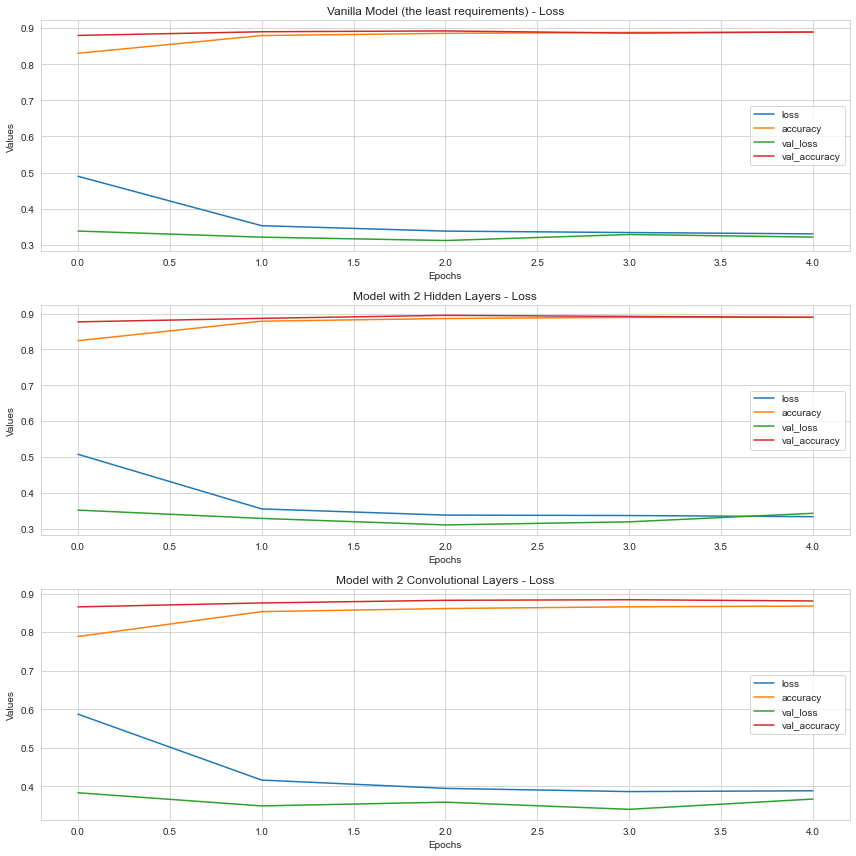

In [47]:
model_data = [(loss_df, 'Vanilla Model (the least requirements)'),
              (loss_df1, 'Model with 2 Hidden Layers'),
              (loss_df2, 'Model with 2 Convolutional Layers')]

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

for i, (model_df, model_name) in enumerate(model_data):
    model_df.plot(ax=axes[i])
    axes[i].set_title(f'{model_name} - Loss')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Values')

# Adjust layout
plt.tight_layout()
plt.show()


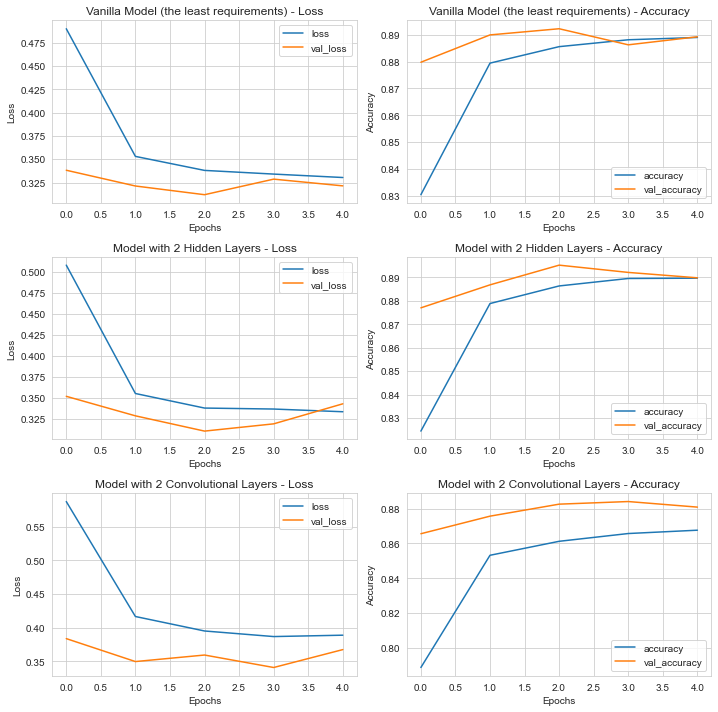

In [48]:
# Create a list of dataframes and their right  names
model_data = [(loss_df, 'Vanilla Model (the least requirements)'),
              (loss_df1, 'Model with 2 Hidden Layers'),
              (loss_df2, 'Model with 2 Convolutional Layers')]

# Create subplots for each model
fig, axes = plt.subplots(len(model_data), 2, figsize=(10, 10))

for i, (model_df, model_name) in enumerate(model_data):
    # Plot loss
    model_df[['loss', 'val_loss']].plot(ax=axes[i, 0])
    axes[i, 0].set_title(f'{model_name} - Loss')
    axes[i, 0].set_xlabel('Epochs')
    axes[i, 0].set_ylabel('Loss')

    # Plot accuracy
    model_df[['accuracy', 'val_accuracy']].plot(ax=axes[i, 1])
    axes[i, 1].set_title(f'{model_name} - Accuracy')
    axes[i, 1].set_xlabel('Epochs')
    axes[i, 1].set_ylabel('Accuracy')

# Adjust layout
plt.tight_layout()
plt.show()

#####  As conclution 
 - We can see for the first model that we have some overfitting for when we check the curve if the accuracy and compare between the train and Val
 - the second one is the best one regarding the comparing the results 
 - also the third one is good has regarding the curv of the figure 

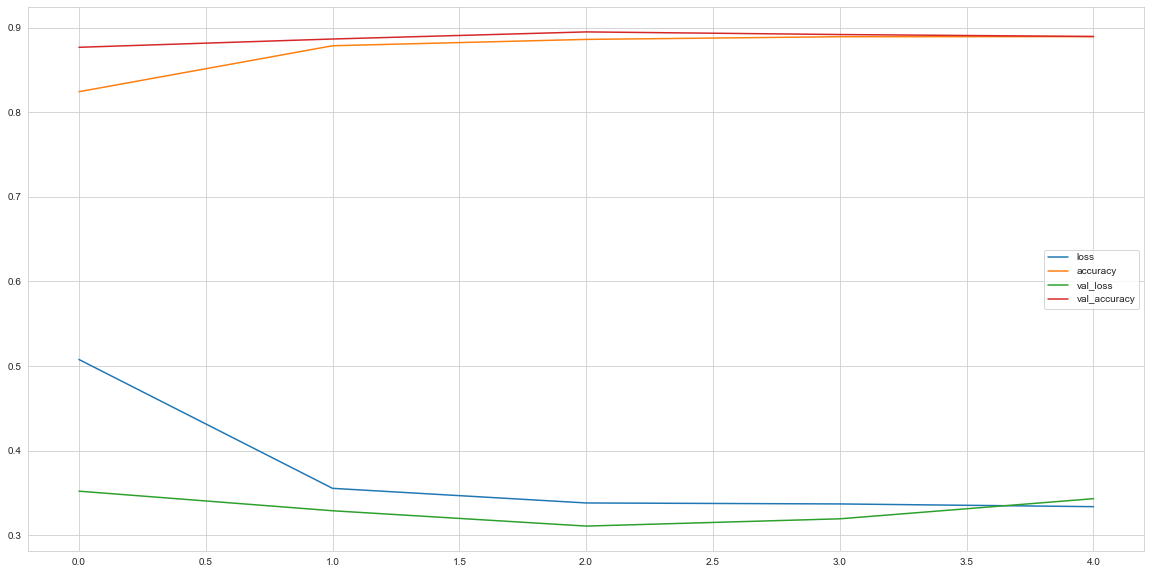

In [50]:
loss_df1.plot();

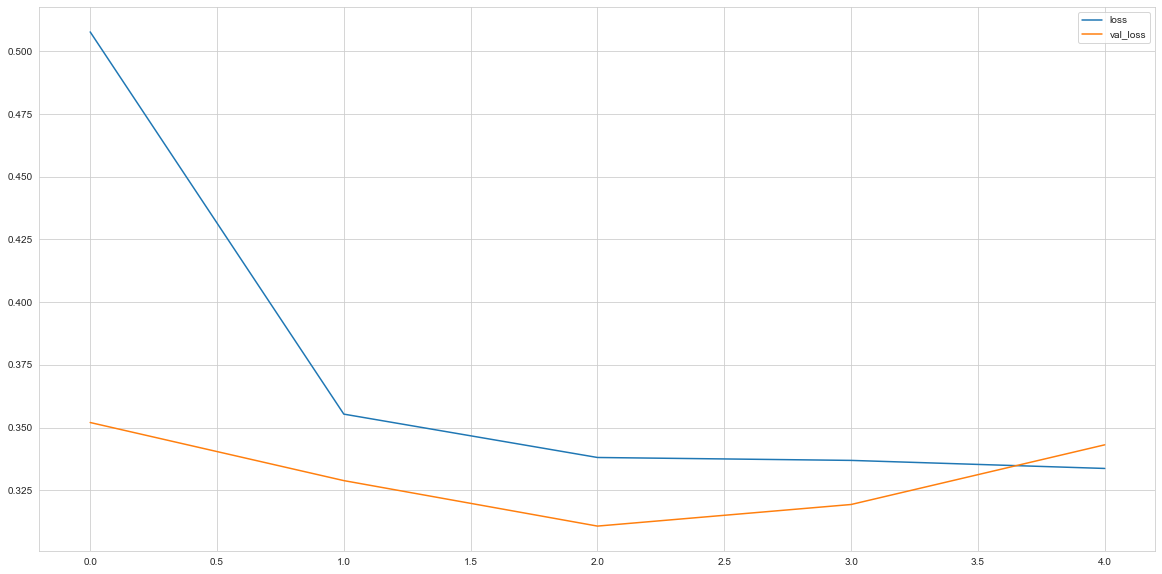

In [51]:
loss_df1[['loss','val_loss']].plot();

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

# Define a class called ImageClassifier
class ImageClassifier:
    def __init__(self, model, x_train, y_train, x_test, y_test, classes):
        # Constructor to initialize the class with model, training and testing data, and class labels
        self.model = model          # The neural network model
        self.x_train = x_train      # Training data features
        self.y_train = y_train      # Training data labels
        self.x_test = x_test        # Testing data features
        self.y_test = y_test        # Testing data labels
        self.classes = classes      # List of class labels

    def get_predicted_results(self, dataset):
        # Method to get predicted results for a specified dataset (train or test)
        if dataset == 'train':
            y_pred = self.model.predict(self.x_train)  # Predictions on the training data
            y_true = self.y_train                     # True labels of the training data
        elif dataset == 'test':
            y_pred = self.model.predict(self.x_test)   # Predictions on the testing data
            y_true = self.y_test                      # True labels of the testing data
        else:
            raise ValueError("Dataset must be 'train' or 'test'.")  # Raise an error for invalid dataset

        # Convert numerical predictions and true labels to class labels
        y_pred_labels = [self.classes[i] for i in np.argmax(y_pred, axis=1)]
        y_true_labels = [self.classes[i] for i in np.argmax(y_true, axis=1)]

        return y_pred_labels, y_true_labels

    def show_results(self, dataset):
        # Method to display the classification report for a specified dataset (train or test)
        y_pred_labels, y_true_labels = self.get_predicted_results(dataset)

        print(f"{dataset.capitalize()} Classification Report:")
        print(classification_report(y_true_labels, y_pred_labels, target_names=self.classes))

    def plot_confusion_matrix(self, dataset):
        # Method to plot the confusion matrix for a specified dataset (train or test)
        y_pred_labels, y_true_labels = self.get_predicted_results(dataset)

        # Generate the confusion matrix
        confusion = confusion_matrix(y_true_labels, y_pred_labels)

        # Plot the confusion matrix as a heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=self.classes, yticklabels=self.classes)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'{dataset.capitalize()} Confusion Matrix')
        plt.show()

In [53]:
image_classifier = ImageClassifier(model1, x_train, y_train, x_test, y_test, classes)

1875/1875 [==============================] - 7s 4ms/step


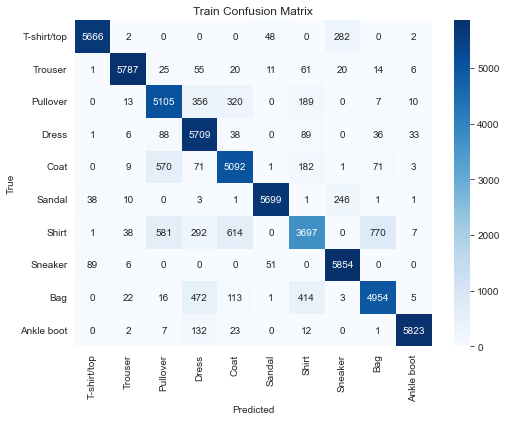

1875/1875 [==============================] - 15s 8ms/step
Train Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.98      0.94      0.96      6000
     Trouser       0.98      0.96      0.97      6000
    Pullover       0.80      0.85      0.82      6000
       Dress       0.81      0.95      0.87      6000
        Coat       0.82      0.85      0.83      6000
      Sandal       0.98      0.95      0.97      6000
       Shirt       0.80      0.62      0.69      6000
     Sneaker       0.91      0.98      0.94      6000
         Bag       0.85      0.83      0.84      6000
  Ankle boot       0.99      0.97      0.98      6000

    accuracy                           0.89     60000
   macro avg       0.89      0.89      0.89     60000
weighted avg       0.89      0.89      0.89     60000



In [54]:
image_classifier.plot_confusion_matrix('train')
image_classifier.show_results('train')

313/313 [==============================] - 1s 3ms/step


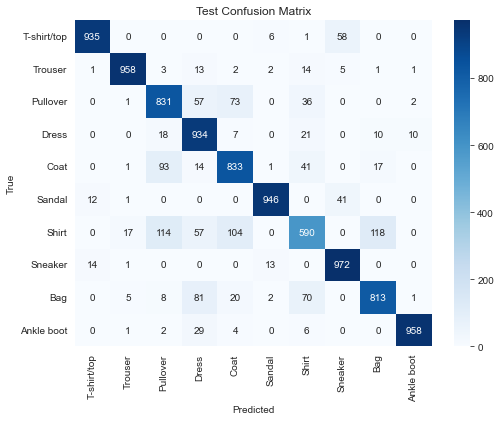

313/313 [==============================] - 1s 4ms/step
Test Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.97      0.94      0.95      1000
     Trouser       0.97      0.96      0.97      1000
    Pullover       0.78      0.83      0.80      1000
       Dress       0.79      0.93      0.85      1000
        Coat       0.80      0.83      0.82      1000
      Sandal       0.98      0.95      0.96      1000
       Shirt       0.76      0.59      0.66      1000
     Sneaker       0.90      0.97      0.94      1000
         Bag       0.85      0.81      0.83      1000
  Ankle boot       0.99      0.96      0.97      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [55]:
image_classifier.plot_confusion_matrix('test')
image_classifier.show_results('test')

## Prediction

In [56]:
def plot_sample_with_prediction(model1, x_test, y_test, classes, sample_index):
    sample = x_test[sample_index]
    sample = np.expand_dims(sample, 0)
    pred_prob = model.predict(sample)
    y_pred = np.argmax(pred_prob)
    y_true = np.argmax(y_test[sample_index])

    # Plot
    plt.figure(figsize=(4, 4))
    plt.imshow(sample[0], cmap='gray')
    plt.title(f'Actual: {classes[y_true]}\nPredicted: {classes[y_pred]}')
    plt.axis('off')
    plt.show()


1/1 [==============================] - 0s 69ms/step


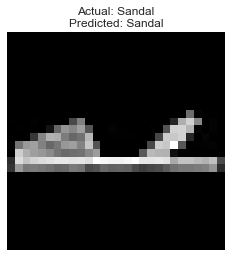

In [57]:
plot_sample_with_prediction(model1, x_test, y_test, classes, 111)

##  End of Assignment